In [4]:
##############################
# Solves - u'' + u = f       #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = -0.5
b = 0.5


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)


def g(*x):
    return np.zeros_like(x[0])

In [5]:
# Parameters
d = 1
k = 2
delta = 1.
N = 101

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N, flat=True)
idx_funcs = [
    lambda cs: np.all([np.logical_and(c != a, c != b) for c in cs], axis=0),
    lambda cs: np.any([np.logical_or(c == a, c == b) for c in cs], axis=0),
]
operators = [
    lambda func, *args: - func.laplacian(*args) + func(*args),
    lambda func, *args: func(*args, m=0),
]

# Integration
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Solve for approximate solution
solver = rad.solve.CollocationSolver(d, k, delta, xc, operators, idx_funcs)
approx = solver.solve(f, g)
error = rad.error(exact, approx, error_integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())

L2 Relative Error: 0.19899486552679155
Condition Number: 21326.20226762018


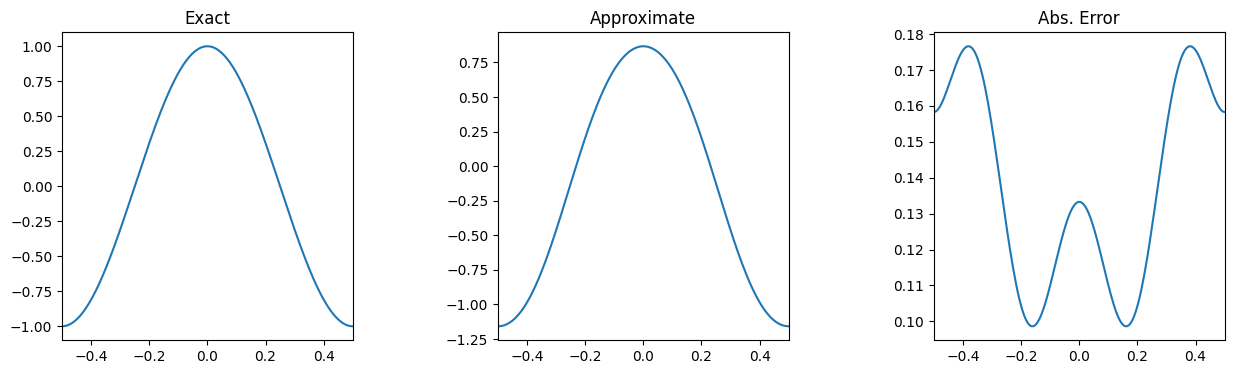

In [6]:
rad.plot.spread(
    ranges,
    exact,
    approx,
    lambda *x: np.abs(exact(*x) - approx(*x)),
    n=200,
    wspace=0.5,
    hspace=0.5,
    titles=["Exact", "Approximate", "Abs. Error"],
    figsize=(15, 4),
)